In [34]:
# Import the necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics

In [35]:
# We need to import the 'weather_energy_merged' csv
starter_df = pd.read_csv('/content/drive/MyDrive/Project_4/Resources/weather_energy_merged.csv')

starter_df.head()

,state,st_abb,date,tmin (f),tmax (f),tavg (f),ppt,coal (kt),natural gas (kMcf),petroleum coke (kt),petroleum liquids (kb)
0,Alabama,AL,2001-01-01,29.1524,51.8234,40.4870,119.501,3076,7802,0,340
1,Arkansas,AR,2001-01-01,26.6612,45.7412,36.2012,88.598,1320,2885,0,222
2,Arizona,AZ,2001-01-01,28.2722,51.9206,40.0964,41.955,1773,7222,0,268
3,California,CA,2001-01-01,31.7372,52.7198,42.2276,87.828,154,106635,94,625
4,Colorado,CO,2001-01-01,11.2748,37.4252,24.3500,25.485,1777,6538,0,52


In [36]:
# Prophet expects only two columns, the DS or datestamp and the X value
# So I need to make a new dataframe

filtered_df = starter_df[starter_df['state']=='Texas']

# Keep only the relevant columns
filtered_df = filtered_df[['date','coal (kt)']]

# Rename date to DS and coal (kt) to y
filtered_df = filtered_df.rename(columns={'date':'ds','coal (kt)':'y'})

# Ensure the 'DS' column is of datetime type
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

filtered_df.head()

,ds,y
40,2001-01-01,8003
88,2001-02-01,7221
136,2001-03-01,7610
184,2001-04-01,6900
232,2001-05-01,8164


In [37]:
# Initalize the Prophet model
model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    changepoint_prior_scale=0.25,
    seasonality_prior_scale=10
    )

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(filtered_df)

# Make futuer dataframe for predictions
future = model.make_future_dataframe(periods=730)

# Make predictions
forecast = model.predict(future)

# Check properties of forecast
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/58_wu323.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/md2o0yld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55776', 'data', 'file=/tmp/tmplbl8li30/58_wu323.json', 'init=/tmp/tmplbl8li30/md2o0yld.json', 'output', 'file=/tmp/tmplbl8li30/prophet_model25ms3td0/prophet_model-20241206024011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,5948.187784,7397.580304,8937.075614,5948.187784,5948.187784,2233.819827,2233.819827,2233.819827,1884.438923,...,-9.665514,-9.665514,-9.665514,359.046418,359.046418,359.046418,0.0,0.0,0.0,8182.007611
1,2001-02-01,5960.509906,6490.306067,7947.838980,5960.509906,5960.509906,1231.278041,1231.278041,1231.278041,2096.633808,...,40.288931,40.288931,40.288931,-905.644698,-905.644698,-905.644698,0.0,0.0,0.0,7191.787947
2,2001-03-01,5971.639565,5790.806189,7354.111156,5971.639565,5971.639565,608.326833,608.326833,608.326833,1980.866491,...,40.288931,40.288931,40.288931,-1412.828588,-1412.828588,-1412.828588,0.0,0.0,0.0,6579.966398
3,2001-04-01,5983.961687,5620.850578,7139.697469,5983.961687,5983.961687,409.921909,409.921909,409.921909,1854.025900,...,-144.906836,-144.906836,-144.906836,-1299.197155,-1299.197155,-1299.197155,0.0,0.0,0.0,6393.883596
4,2001-05-01,5995.886322,7252.696615,8744.692087,5995.886322,5995.886322,1997.014138,1997.014138,1997.014138,1980.866491,...,-47.048084,-47.048084,-47.048084,63.195731,63.195731,63.195731,0.0,0.0,0.0,7992.900459


In [38]:
# Perform cross-validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')


INFO:prophet:Making 41 forecasts with cutoffs between 2003-03-16 00:00:00 and 2022-12-01 00:00:00


  0%|          | 0/41 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/bo8ziy0r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/vmyszdd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32771', 'data', 'file=/tmp/tmplbl8li30/bo8ziy0r.json', 'init=/tmp/tmplbl8li30/vmyszdd9.json', 'output', 'file=/tmp/tmplbl8li30/prophet_model5sp7gz2k/prophet_model-20241206024020.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:40:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/3w9ppxi7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplbl8li30/sv7tdq62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

In [39]:
# Calculate performance metrics
df_p = performance_metrics(df_cv, metrics=['mse', 'rmse', 'mae'])

print(df_p)

     horizon           mse         rmse          mae
0    37 days  1.093213e+06  1045.568034   827.816340
1    38 days  1.087036e+06  1042.610281   828.718786
2    40 days  1.065286e+06  1032.126874   814.787089
3    41 days  1.059688e+06  1029.411259   811.562895
4    42 days  1.091931e+06  1044.955242   842.449406
..       ...           ...          ...          ...
261 360 days  4.425820e+06  2103.763324  1422.661069
262 361 days  4.563929e+06  2136.335301  1452.531181
263 362 days  4.550062e+06  2133.087521  1447.371835
264 364 days  4.555530e+06  2134.368863  1451.011872
265 365 days  4.421753e+06  2102.796437  1389.404800

[266 rows x 4 columns]


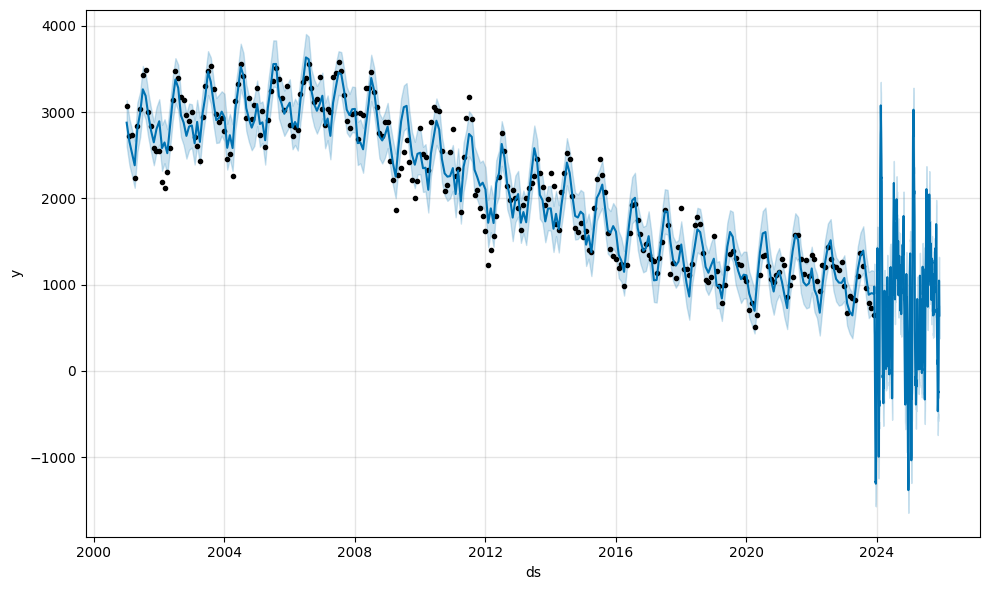

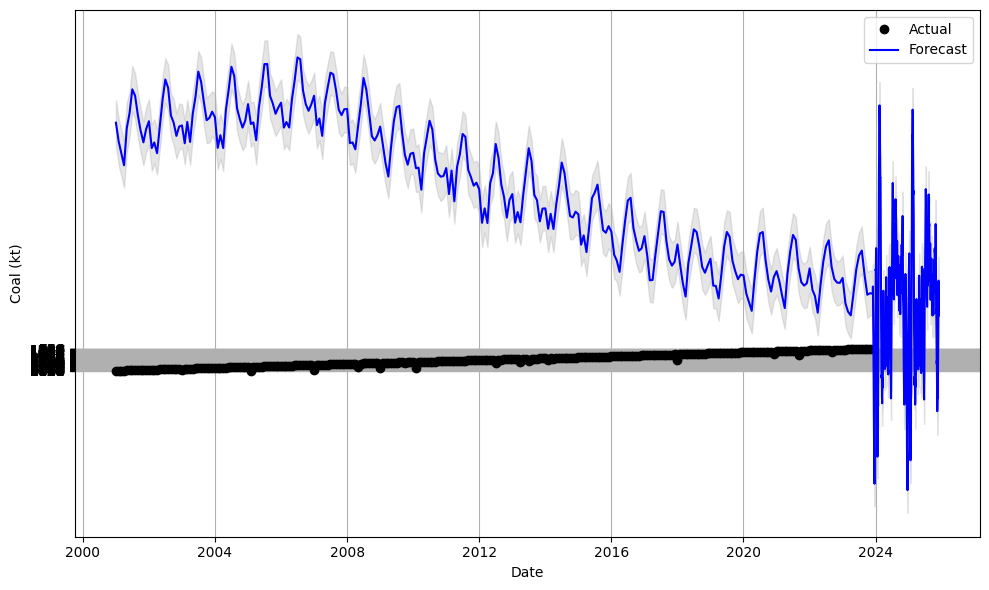

In [18]:
# Plot the forecast
model.plot(forecast)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
ax.plot(filtered_df['ds'], filtered_df['y'], 'ko', label='Actual')

# Plot the forecast
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot the uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)

# Customize the plot ax.set_title('Customized Forecast Plot')
ax.set_xlabel('Date')
ax.set_ylabel('Coal (kt)')
ax.legend()

plt.grid()
plt.tight_layout()
plt.show()